# WeatherPy
---
## Observable trends:
* Latitude vs maximum temperature: The temperature for cities seems to be the highest around the equator and dips considerably as the latitude moves away from 0 degrees
* Latitude vs humidity: No evident correlation between latitude and humidity
* Latitude vs cloudiness: No evident correlation between latitude and cloudiness
* Latitude vs wind speed: No evident correlation between latitude and wind speed

In [1]:
# Dependencies
from citipy import citipy
import numpy as np
import pandas as pd
import openweathermapy as owm
import pandas as pd
import time
import matplotlib.pyplot as plt
import datetime

# import api_key from config file
from api_keys import owm_api_key

## Generate Cities List

In [2]:
# Set latitude and longitude comments
long_low = -180
long_high = 180
lat_low = -90
lat_high = 90

In [3]:
lat_lst = []
long_lst = []

# Populate 2 lists with random latitudes and longitudes
lat_lst = np.random.uniform(low=lat_low, high=lat_high, size=1500)
long_lst = np.random.uniform(low=long_low, high=long_high, size=1500)

# Zip the 2 lists
coordinate_pairs = zip(lat_lst,long_lst)

In [4]:
cities = []

# For the corresponding geo codes, get the nearest city
for coordinate_pair in coordinate_pairs:
    cities.append(citipy.nearest_city(coordinate_pair[0], coordinate_pair[1]))

In [5]:
city_lst=[]

# Append city name to a list
for city in cities:
    if city.city_name not in city_lst: # Append only unique entries
        city_lst.append(city.city_name)

# This is same as
# city_lst=[city.city_name for city in cities]
# city_lst

## Perform API Calls

In [6]:
# Declare keyword arguments for weather API function
settings = {"APPID": owm_api_key, "units": "imperial"}

# Declare arguments to extract required attributes from the citypy object
extracts = ["name", "sys.country", "coord.lat",
            "coord.lon", "dt","main.temp_max", "main.humidity","clouds.all", "wind.speed"]

# data =[]
# current_weather_city = owm.get_current("Paris", **settings)
# data.append(current_weather_city(*extracts))
count = 0
data =[]

for i in city_lst:
    try:
        current_weather_city = owm.get_current(i, **settings) # Get current weather data
        data.append(current_weather_city(*extracts)) # Append required attributes to a list
        count = count+1
        print(f"Processing record #{count}. Retrieving current weather data for {i}") #Include a print log of each city as it's being processed with the city number and city name.
        time.sleep(1)

        if(len(data)>=500): # Exit for loop if 500 logs have been entered
            break

    except Exception as e:
              print(f"An error occured. We could not retrieve weather data for {i}")

print(len(data))

An error occured. We could not retrieve weather data for kemijarvi
Processing record #1. Retrieving current weather data for bredasdorp
Processing record #2. Retrieving current weather data for coquimbo
Processing record #3. Retrieving current weather data for provideniya
Processing record #4. Retrieving current weather data for bambous virieux
Processing record #5. Retrieving current weather data for albany
Processing record #6. Retrieving current weather data for saint-philippe
Processing record #7. Retrieving current weather data for rio verde de mato grosso
Processing record #8. Retrieving current weather data for pevek
Processing record #9. Retrieving current weather data for sao filipe
Processing record #10. Retrieving current weather data for ray
Processing record #11. Retrieving current weather data for avarua
Processing record #12. Retrieving current weather data for rikitea
Processing record #13. Retrieving current weather data for namibe
Processing record #14. Retrieving cur

Processing record #107. Retrieving current weather data for emerald
Processing record #108. Retrieving current weather data for campbell river
Processing record #109. Retrieving current weather data for matamoros
Processing record #110. Retrieving current weather data for longyearbyen
Processing record #111. Retrieving current weather data for jerusalem
Processing record #112. Retrieving current weather data for pecos
Processing record #113. Retrieving current weather data for flinders
Processing record #114. Retrieving current weather data for victoria
Processing record #115. Retrieving current weather data for talnakh
Processing record #116. Retrieving current weather data for grimshaw
Processing record #117. Retrieving current weather data for umm kaddadah
Processing record #118. Retrieving current weather data for lazaro cardenas
Processing record #119. Retrieving current weather data for luba
Processing record #120. Retrieving current weather data for shimoda
Processing record #12

Processing record #211. Retrieving current weather data for eydhafushi
Processing record #212. Retrieving current weather data for kloulklubed
Processing record #213. Retrieving current weather data for katherine
Processing record #214. Retrieving current weather data for marechal candido rondon
Processing record #215. Retrieving current weather data for teya
Processing record #216. Retrieving current weather data for padang
Processing record #217. Retrieving current weather data for umkomaas
Processing record #218. Retrieving current weather data for bonthe
Processing record #219. Retrieving current weather data for alice springs
Processing record #220. Retrieving current weather data for senanga
Processing record #221. Retrieving current weather data for voh
Processing record #222. Retrieving current weather data for isangel
An error occured. We could not retrieve weather data for mustafakemalpasa
Processing record #223. Retrieving current weather data for byron bay
Processing record

Processing record #318. Retrieving current weather data for hamilton
An error occured. We could not retrieve weather data for longlac
Processing record #319. Retrieving current weather data for cimislia
Processing record #320. Retrieving current weather data for evensk
Processing record #321. Retrieving current weather data for sao francisco
Processing record #322. Retrieving current weather data for ojinaga
Processing record #323. Retrieving current weather data for san luis
Processing record #324. Retrieving current weather data for san jose
An error occured. We could not retrieve weather data for tsihombe
Processing record #325. Retrieving current weather data for kouvola
Processing record #326. Retrieving current weather data for haines junction
Processing record #327. Retrieving current weather data for magadan
Processing record #328. Retrieving current weather data for chupa
Processing record #329. Retrieving current weather data for marawi
Processing record #330. Retrieving curr

Processing record #420. Retrieving current weather data for sorong
Processing record #421. Retrieving current weather data for moerai
Processing record #422. Retrieving current weather data for jacksonville
An error occured. We could not retrieve weather data for novobessergenevka
Processing record #423. Retrieving current weather data for antofagasta
Processing record #424. Retrieving current weather data for bajil
Processing record #425. Retrieving current weather data for puro
Processing record #426. Retrieving current weather data for oussouye
Processing record #427. Retrieving current weather data for vanavara
Processing record #428. Retrieving current weather data for turayf
Processing record #429. Retrieving current weather data for trairi
Processing record #430. Retrieving current weather data for yar-sale
Processing record #431. Retrieving current weather data for pleasant point
Processing record #432. Retrieving current weather data for nikolskoye
An error occured. We could n

## Convert Raw Data to DataFrame

In [7]:
# Save the summarized data in a dataframe
column_names = ["City", "Country", "Latitude", "Longitude", "Date", "Max Temperature (°F)", "Humidity (%)", 
                "Cloudiness (%)", "Wind speed (mph)"]
summary_df = pd.DataFrame(data, columns = column_names)
summary_df = summary_df.set_index('City')
summary_df

,Country,Latitude,Longitude,Date,Max Temperature (°F),Humidity (%),Cloudiness (%),Wind speed (mph)
City,,,,,,,,
Bredasdorp,ZA,-34.53,20.04,1552777237,71.60,88,12,5.82
Coquimbo,CL,-29.95,-71.34,1552777200,59.00,82,90,6.06
Provideniya,RU,64.42,-173.23,1552777974,19.24,100,0,13.78
Bambous Virieux,MU,-20.34,57.76,1552777748,77.00,88,40,3.36
Albany,US,42.65,-73.75,1552777425,37.99,50,90,18.34
Saint-Philippe,CA,45.36,-73.48,1552777910,30.99,50,75,16.11
Rio Verde de Mato Grosso,BR,-18.92,-54.84,1552777979,78.33,78,12,1.70
Pevek,RU,69.70,170.27,1552777980,-15.23,90,0,13.78
Sao Filipe,CV,14.90,-24.50,1552777981,72.39,90,0,11.99


In [8]:
# Export dataframe to a CSV
summary_df.to_csv(r'.\WeatherPy_RK_Output\WeatherPy_RK.csv')

In [9]:
# Plotting 4 charts in one go 
#  Not ideal because as per the homework sample, the chart attributes are slightly different from the actual column names
# for column in summary_df:
#     if (column != "Latitude") and (column != "Longitude"):
#         x_axis = summary_df['Latitude']
#         y_axis = summary_df[column]
#         plt.figure()
#         plt.scatter(x_axis, y_axis, marker="o", facecolors="lightblue", edgecolors="black", alpha=0.75, linewidths = 2)
#         plt.title(f"{column} vs Latitude")
#         plt.xlabel("Latitude")
#         plt.ylabel(f"{column}")
#         plt.grid()

In [10]:
# Plot the scatter plots
# Primitive - this way, the chart settings will have to be defined every single time the charts are plotted
# City Latitude vs Max Temperature (°F)
# x_axis = summary_df['Latitude']
# y_axis = summary_df['Max Temperature (°F)']
# plt.scatter(x_axis, y_axis, marker="o", facecolors="lightblue", edgecolors="black", alpha=0.75, linewidths = 2)
# plt.title(f"City Latitude vs Max Temperature (°F)")
# plt.xlabel("Latitude")
# plt.ylabel(f"Max Temperature (°F)")
# plt.grid()

## Scatter Plots

In [11]:
# Set standard chart parameters
chart_settings = {"marker": "o", "facecolors": "skyblue", "edgecolors": "black", "alpha": 1, "linewidths": 1 }
todays_date = (datetime.datetime.today()).strftime('%m/%d/%y')

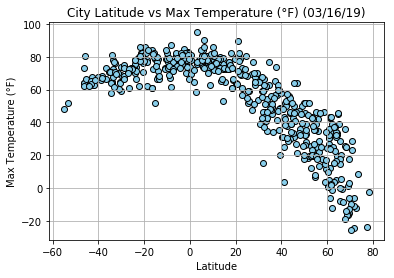

In [12]:
#Chart 1: City Latitude vs Max Temperature (°F)
x_axis = summary_df['Latitude']
y_axis = summary_df['Max Temperature (°F)']
plt.scatter(x_axis, y_axis, **chart_settings)
plt.title(f"City Latitude vs Max Temperature (°F) ({todays_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.grid()
plt.savefig('.\WeatherPy_RK_Output\Lat_vs_Maxtemp.png', bbox_inches='tight')

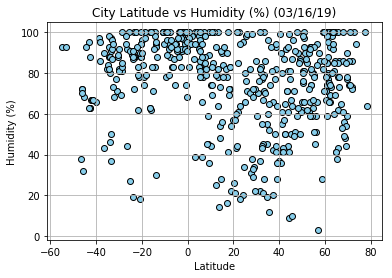

In [13]:
#Chart 2: City Latitude vs Humidity (%)
x_axis = summary_df['Latitude']
y_axis = summary_df['Humidity (%)']
plt.scatter(x_axis, y_axis, **chart_settings)
plt.title(f"City Latitude vs Humidity (%) ({todays_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig('.\WeatherPy_RK_Output\Lat_vs_Humidity.png', bbox_inches='tight')

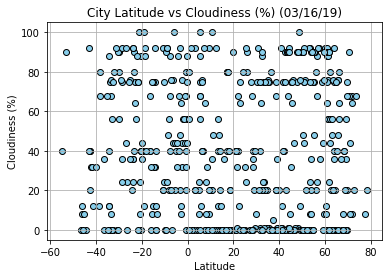

In [14]:
#Chart 3: City Latitude vs Cloudiness (%)
x_axis = summary_df['Latitude']
y_axis = summary_df['Cloudiness (%)']
plt.scatter(x_axis, y_axis, **chart_settings)
plt.title(f"City Latitude vs Cloudiness (%) ({todays_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig('.\WeatherPy_RK_Output\Lat_vs_Cloudiness.png', bbox_inches='tight')

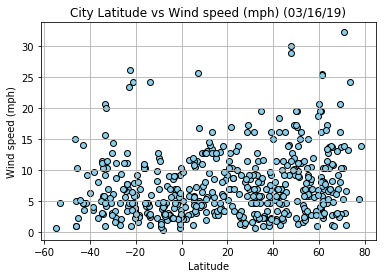

In [15]:
#Chart 4: City Latitude vs Wind speed (mph)
x_axis = summary_df['Latitude']
y_axis = summary_df['Wind speed (mph)']
plt.scatter(x_axis, y_axis, **chart_settings)
plt.title(f"City Latitude vs Wind speed (mph) ({todays_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind speed (mph)")
plt.grid()
plt.savefig('.\WeatherPy_RK_Output\Lat_vs_WindSpeed.png', bbox_inches='tight')